# Жесткие системы ОДУ
## Задача 3.2


Система Ван-дер-Поля и траектория утки 
$$ y'= a (- ( \frac{y^3}{3}- y) + x)$$
$$ x'= -y + B cos(wt)$$
Параметр a большой.В расчетах рассмотрим два случая:

a = 10^3 и a=10^6

y_1(0) = 2, x(0) = 0

0<B<1 и 1<B< $ \sqrt{1+\frac{1}{64w^2}}$ 

Исследуем при различных w, конечное время интегрирования T_k = 200 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import scipy 
from scipy.integrate import solve_ivp

## Radau

In [25]:
def f(a,y,x,B ,w,t):
    return a*(-y**3/3+y+x) 
def g(a,y,x,B ,w,t):
    return -y + B * m.cos(w*t)

In [97]:
def runge_kutta(n,x0,y0,c, b, a,l,B,s):
    v = [x0]
    w = [y0]

    t = np.linspace(0,200)
    N=1/10**9

    for x in t[:-1]:
        k_v = []
        k_w = []
        
        for step in range(s):
            x_cur = x + c[step] * N
            w_cur = w[-1] + N*sum([a[step][i] * k_w[i] for i in range(step)])
            v_cur = v[-1] + N*sum([a[step][i] * k_v[i] for i in range(step)])
            
            k_w.append(f(n,w_cur,v_cur,B,l,x_cur))
            k_v.append(g(n,w_cur,v_cur,B,l,x_cur))
            
            
        v.append(v[-1] + N*sum([b[i] * k_v[i] for i in range(s)]))
        w.append(w[-1] + N*sum([b[i] * k_w[i] for i in range(s)]))
  
    return v,w

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

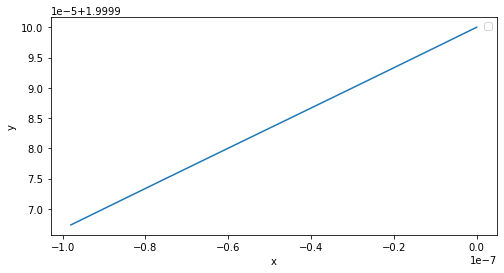

In [98]:
A = np.array([[5/3, -1/3], [3, 1]]) / 4
b = np.array([3, 1]) / 4
C = np.array([1/3, 1])
s=2
n = 10**3
w=[0, m.pi/4, m.pi/2]
B=1
x,y = runge_kutta(n, 0, 2, C, b, A,w[2], B/100,s)
plt.figure(figsize=(8,4)) 
plt.plot(x, y, label='')
plt.legend() 
plt.xlabel('x')
plt.ylabel('y')


In [95]:
print(runge_kutta(n, 0,2, C, b, A,w[2], B/100,s))

([0, -6.666667905472916e-07, -1.3333342417914515e-06, -2.000002353732803e-06, -2.6666711263711816e-06, -3.3333405597059513e-06, -4.0000106537360244e-06, -4.666681408459891e-06, -5.333352823875653e-06, -6.000024899981067e-06, -6.666697636773595e-06, -7.33337103425045e-06, -8.00004509240866e-06, -8.666719811245122e-06, -9.33339519075667e-06, -1.000007123094013e-05, -1.0666747931792386e-05, -1.1333425293310448e-05, -1.2000103315491503e-05, -1.2666781998332976e-05, -1.3333461341832586e-05, -1.4000141345988389e-05, -1.4666822010798825e-05, -1.533350333626275e-05, -1.6000185322379468e-05, -1.666686796914876e-05, -1.7333551276570883e-05, -1.800023524464659e-05, -1.866691987337713e-05, -1.933360516276422e-05, -2.0000291112810048e-05, -2.066697772351724e-05, -2.1333664994888823e-05, -2.20003529269282e-05, -2.2667041519639084e-05, -2.3333730773025468e-05, -2.400042068709156e-05, -2.466711126184173e-05, -2.5333802497280436e-05, -2.6000494393412184e-05, -2.666718695024144e-05, -2.7333880167772593e

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

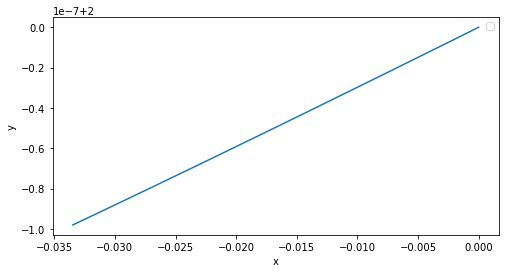

In [96]:
A_3 = [[87-7*m.sqrt(6), (296-169*m.sqrt(6))/1800, (-2+3*m.sqrt(6))/225],
       [(296 + 169*m.sqrt(6))/1800, (87 - 7*m.sqrt(6))/360, (-2 - 3*m.sqrt(6))/225 ],
      [(16 - m.sqrt(6))/36, (16 + m.sqrt(6))/36, 1/9]]
C_3 = [(4 - m.sqrt(6))/10, (4 + m.sqrt(6))/10, 1]
b_3 = [(16 - m.sqrt(6))/36, (16 + m.sqrt(6))/36, 1/9]
s_3 = 3
n = 10**6
B=0.5
x,y = runge_kutta(n, 0,2, C, b, A,w[2], B/100,s)
plt.figure(figsize=(8,4)) 
plt.plot(x, y, label='')
plt.legend() 
plt.xlabel('x')
plt.ylabel('y')

## Однократно диагонально неявные методы Рунге-Кутты



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import scipy.optimize
import math
from mpmath import *
import sympy
from sympy import *

In [2]:
#определение системы уравнений
def f(y, a, B,w ,t):
    y_1, y_2 = y[0], y[1]
    return (a*(-(y_1)**3/3+y_1 +y_2), -y_1 + B * math.cos(w*t) )

In [3]:
class SDIRK_AutonomousSystem:
    """
    Однократно диагонально неявные методы Рунге-Кутты для автономных систем дифференциальных уравнений.

        Параметры:
        a_matrix - матрица размера sxs с a_ij = 0, i>j и a_ii=a для всех i
        b_vector, c_vector - векторы размера sx1
    """
    def __init__(self, a_matrix, b_vector):
        self.__A = a_matrix
        self.__b = b_vector
        self.__s = len(b_vector)
        
        
    def __nonlinear_equation(self, k_i, func, k, i, tau, u_n, params):
        return func(
            u_n 
            + tau*(self.__A[i - 1, :i] @ np.vstack((k[1:i], k_i))),
            **params
        ) - k_i
    
    
    def __call__(self, func, t_0, t_max, tau, u_0, **params):
        """
        Обсчет системы ДУ с правой частью func(u) на отрезке [t_0, t_max] с шагом tau (НУ u(t_0) = u_0).
        
        Параметры:
        func - функция правой части дифференциального уравнения f(t, u)
        t_0 - левая граница отрезка, на котором решается задача Коши
        t_max - правая граница отрезка, на котором решается задача Коши
        tau - величина шага на итерации
        u_0 - значение u(t_0)

        Возвращает значения u на сетке.
        """
        dim = len(u_0)  # размерность системы
        N = int((t_max - t_0) / tau) # число шагов
        u = np.zeros((N+1, dim))  # вектор u(t) в узлах сетки
        u[0] = u_0  # начальное приближение
        for n in range(N):
            k = np.zeros((self.__s + 1, dim))
            for i in range(1, self.__s + 1):
                k[i] = fsolve(self.__nonlinear_equation, k[i-1], args=(func, k, i, tau, u[n], params), maxfev=5000)
            u[n + 1] = u[n] + tau*(self.__b @ k[1:])
        return np.array([t_0 + n * tau for n in range(N+1)]), u  # сетка и решение

### Функции устойчивости

Устойчивость численных методов исследуется на основе модельного уравнения Далквиста $y'= \lambda y $ .
Пусть для данного метода $y_{n+1}=R(z)y_n , z =\tau * \lambda$ при шаге $ \tau $. Тогда при z таких, что |R(z)| < 1 будет область А-устойчивости
(погрешность метода уменьшается на каждом шаге).
А-устойчивый метод является Ln-устойчивым, если $ R(z) \approx 
$


Для методов еявных методов РК функцию устойчивости  можно найти следующим образом:
$$ R(z) = \frac{det(E-zA+zeb^T)}{det(E-zA)}$$
 
Область устойчивости метода задается выражением:
|R(z)|<=1


In [34]:
from numpy.linalg import det

In [35]:
def R(z: complex, A, b):
    s = len(b)
    return det(np.eye(s) - z*A + z*np.ones((s, 1)) @ b.reshape(1, 2)) / det(np.eye(s) - z*A)

In [36]:
RKtable_2_order = [
    np.array([  # А
        [(2 + np.sqrt(2))/2, 0],
        [np.sqrt(2), (2 - np.sqrt(2))/2]
    ]),
    np.array([1/2]*2),  # b
]


In [37]:
print(*RKtable_2_order)

[[1.70710678 0.        ]
 [1.41421356 0.29289322]] [0.5 0.5]


In [38]:
RK_order2 = SDIRK_AutonomousSystem(*RKtable_2_order)

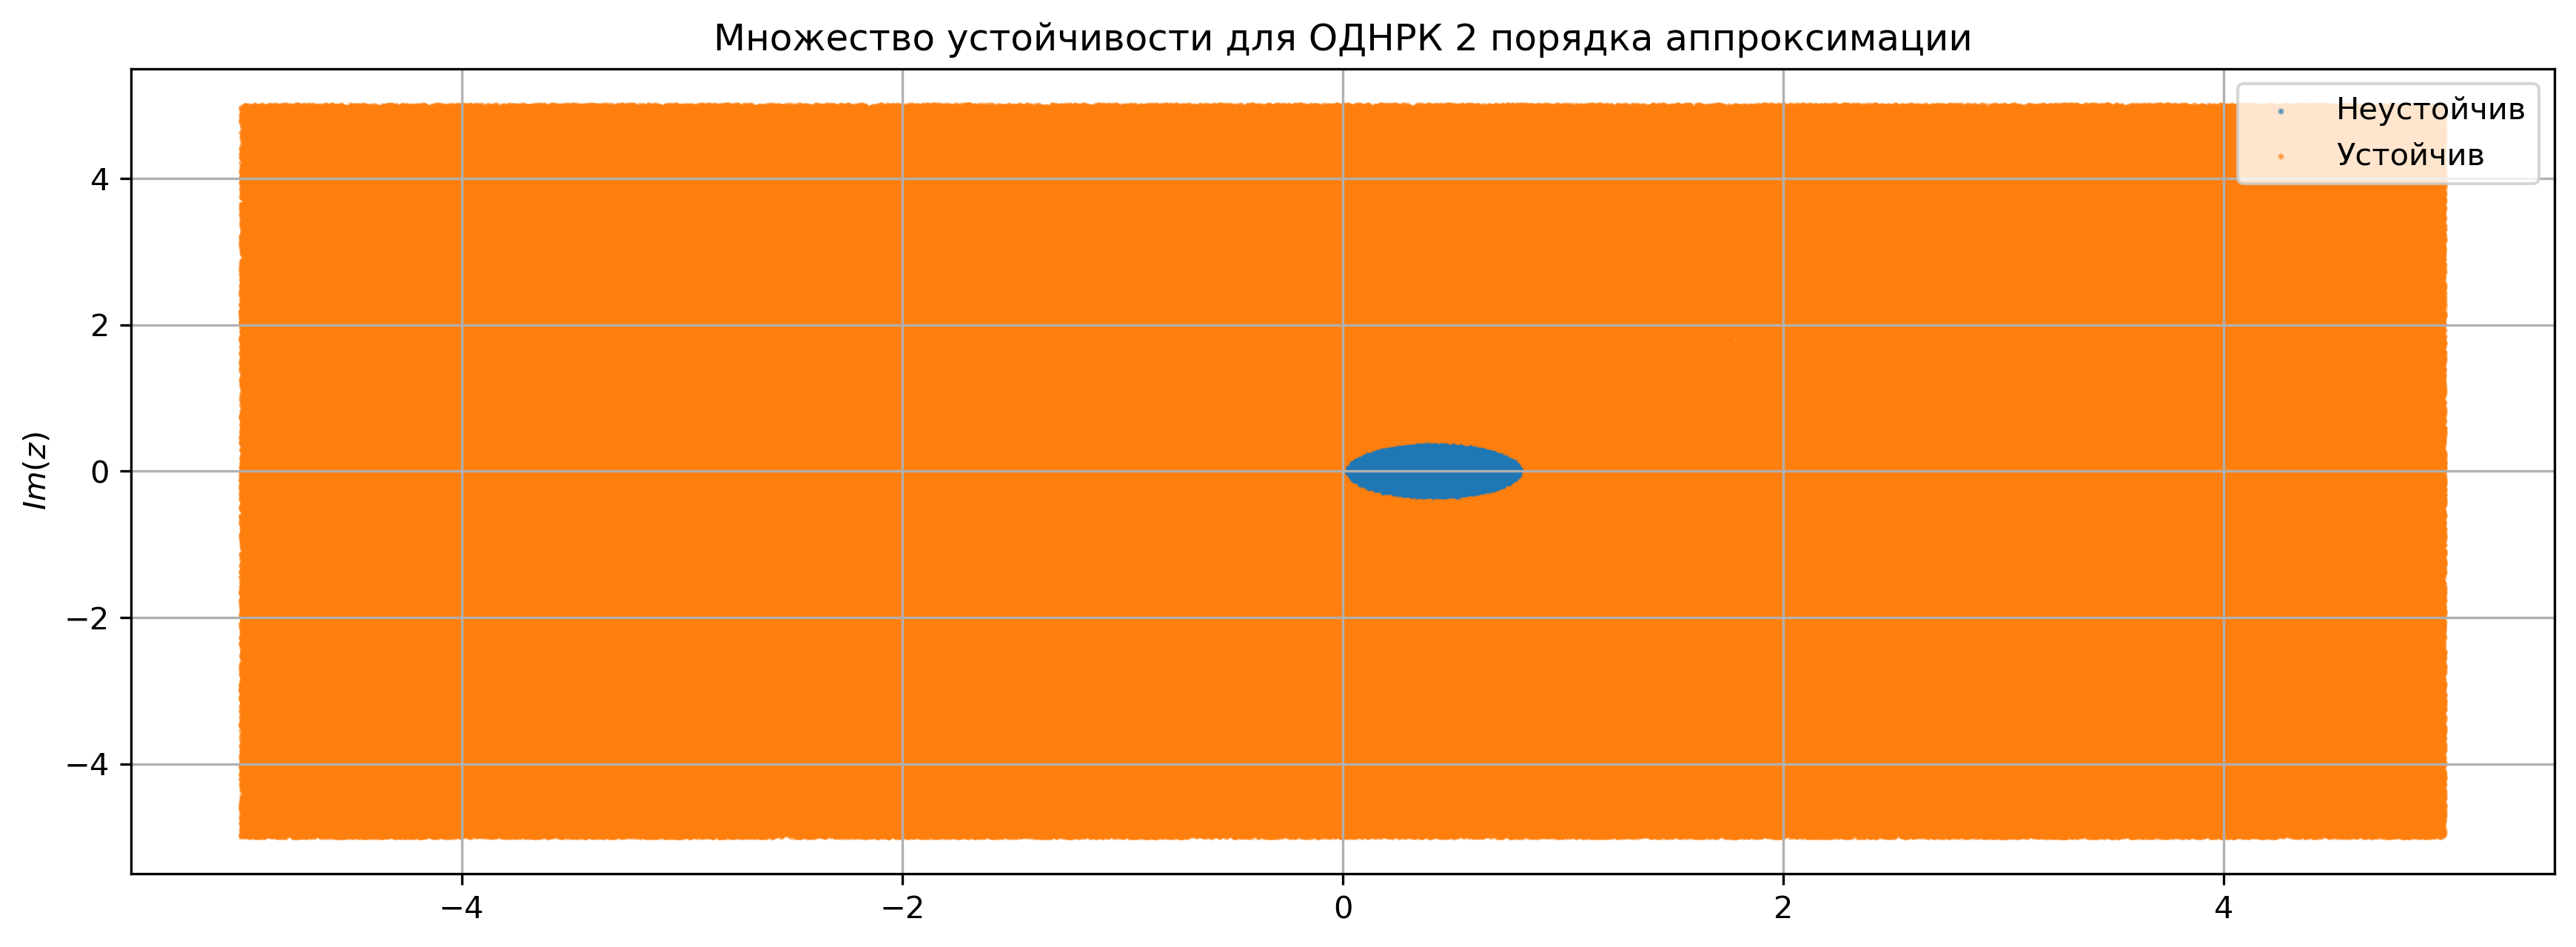

In [9]:
x_range, y_range = np.random.uniform(-5, 5, size=1000000), np.random.uniform(-5, 5, size=1000000)
z_range = x_range + 1j*y_range

stab_2_order = np.array([abs(R(z, *RKtable_2_order)) <= 1 for z in z_range])

fig = plt.figure(figsize=(6.4 * 2.2, 4.8 * 2.2), dpi=300)


def stab_func(value):
    return 'Устойчив' if value else 'Неустойчив'

for k, order in enumerate([stab_2_order]):
    plt.subplot(2, 1, k+1)
    for g in np.unique(order):
        i = np.where(order == g)
        plt.scatter(x_range[i], y_range[i], s=1, label=stab_func(g), alpha=.5, cmap='Reds')
    plt.title(f'Множество устойчивости для ОДНРК {k+2} порядка аппроксимации')
    plt.ylabel('$Im(z)$')
    if k == 1:
        plt.xlabel('$Re(z)$')
    plt.legend(loc='upper right'); plt.grid()

In [73]:
#вспомогательные функции для расчета k1 и k2
def cnt_k1(k1, tau, y, a, A,B,w,t):
    return (f(y+tau*A[0][0]*k1, a, B, w,t)-k1)
#поиск численного решения
def cnt_k2(k2, tau, y, k1, a, A,B, w, t):
    return (f(y+tau*A[1][0]*k1 + tau*A[1][1]*k2, a,B ,w, t)-k2)
def rk(a, tau, A, b):
    t = np.arange(0, 200, tau)
    y = list()
    y.append((2,0 )) # нужно найти свою ообую точку 
    w = math.pi/4
    for _ in range(len(t)-1):
        for B in range(0,100):
            y_cur = y[-1] #(y1, y2)
            k1 = scipy.optimize.fsolve(func = cnt_k1, x0=(10**(-1), 10**(-1)), args = (tau, y_cur, a, A,B/100,w,_))
            k2 = scipy.optimize.fsolve(func =cnt_k2, x0=(10**(-1), 10**(-1)), args = (tau, y_cur, k1, a, A,B/100,w,_))    
            y.append((y_cur + tau*(b[0]*k1)))
    return (t, y)

In [71]:
#построение графиков
def show_rk_results(a, tau0, A, b):
    fig, ax = plt.subplots(1, 3, figsize= (30, 6))
    plot(a, tau=tau0, method=rk, ax=ax[0], fig=fig, args = (A, b))
    plot(a, tau=tau0/2, method=rk, ax=ax[1], fig=fig, args = (A, b))
    plot(a, tau=tau0/10, method=rk, ax=ax[2], fig=fig, args = (A, b))
    plt.show()

### Нахождение решений для данных в задаче методов

При w =0

In [75]:
A1, b1 = RKtable_2_order[0], RKtable_2_order[1]
show_rk_results(a = 1000,  tau0 = 0.01, A = A1,b = b1 )

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BD6C64E708> (for post_execute):


KeyboardInterrupt: 

При w = $ \pi /4$

KeyboardInterrupt: 

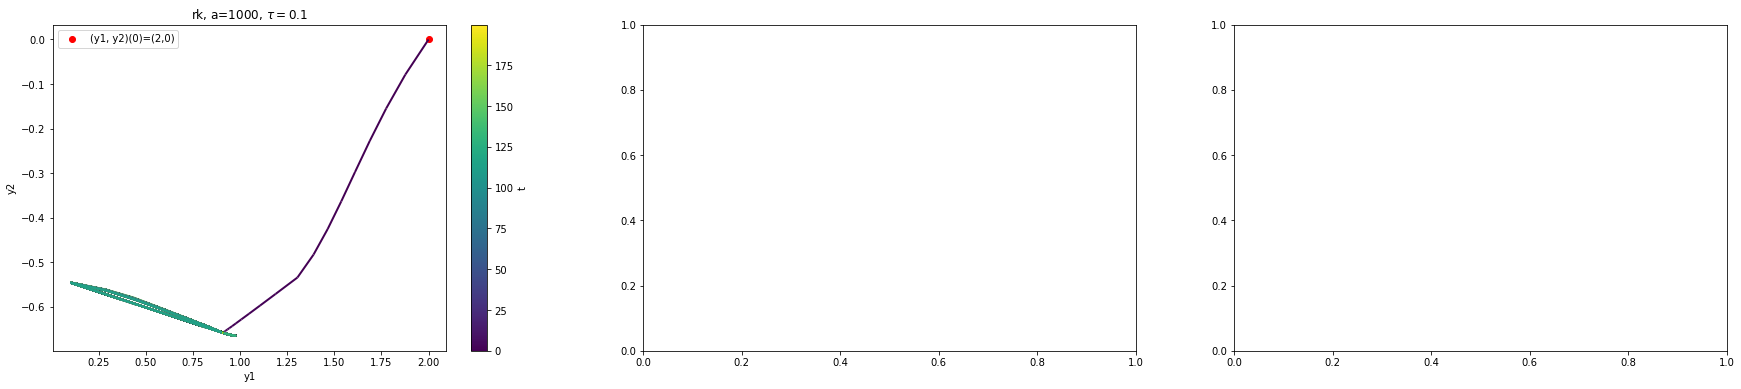

In [72]:
A1, b1 = RKtable_2_order[0], RKtable_2_order[1]
show_rk_results(a = 1000, tau0 = 0.1, A = A1,b = b1 )

фигня какая-то

In [25]:
#определение системы уравнений
def g(y, a):
    y_1, y_2 = y[0], y[1]
    return (a*(-(y_1)**3/3+y_1 +y_2), -y_1  )

In [51]:
#вспомогательные функции для расчета k1 и k2
def cnt_k1(k1, tau, y, a, A):
    return (g(y+tau*A[0][0]*k1, a)-k1)
#поиск численного решения
def cnt_k2(k2, tau, y, k1, a, A):
    return (g(y+tau*A[1][0]*k1 + tau*A[1][1]*k2, a)-k2)
def rk1(a, tau, A, b):
    t = np.arange(0, 200, tau)
    y = list()
    y.append((2,0 )) 
    for _ in range(len(t)-1):
        y_cur = y[-1] #(y1, y2)
        k1 = scipy.optimize.fsolve(func = cnt_k1, x0=(10**(-1), 10**(-1)), args = (tau, y_cur, a, A), maxfev = 100)
        k2 = scipy.optimize.fsolve(func =cnt_k2, x0=(10**(-1), 10**(-1)), args = (tau, y_cur, k1, a, A), maxfev = 100)    
        y.append((y_cur + tau*(b[0]*k1)))
    return (t, y)

In [55]:
def plot(a, tau, method, ax = None, fig = None, args = []):
    if ax == None:
        fig, ax = plt.subplots(figsize = (12, 5))
    t, y = method(a, tau, *args)
    y1, y2 = list(zip(*y))
    points = np.array([y1, y2]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1# работа с матицами
    norm = plt.Normalize(min(t), max(t))
    lc = LineCollection(segments, norm=norm)# позволяет рисовать несколь линий на графике
    line = ax.add_collection(lc)
    lc.set_array(t)
    lc.set_linewidth(2)

    if fig:
        fig.colorbar(line, ax = ax, label = "t")
    ax.scatter([2], [0], color = "r", label = "(y1, y2)(0)=(2,0)")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    ax.set_title(method.__name__+", a=" + str(a) + ", $ \\tau=$" + str(tau))
    ax.legend()
    return (t, y1, y2)

In [56]:
def show_rk_results(a, tau0, A, b):
    fig, ax = plt.subplots(1, 3, figsize= (30, 6))
    plot(a, tau=tau0, method=rk1, ax=ax[0], fig=fig, args = (A, b))
    plot(a, tau=tau0/2, method=rk1, ax=ax[1], fig=fig, args = (A, b))
    plot(a, tau=tau0/10, method=rk1, ax=ax[2], fig=fig, args = (A, b))
    plt.show()

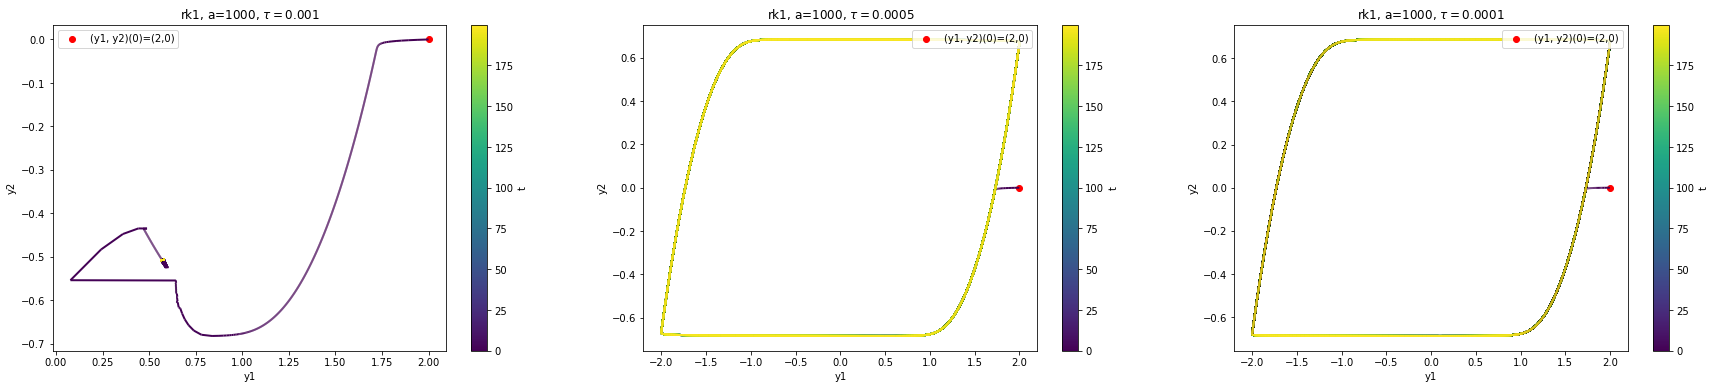

In [63]:
A1, b1 = RKtable_2_order[0], RKtable_2_order[1]
show_rk_results(a = 1000, tau0 = 1*10**(-3), A = A1,b = b1 )

C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 100.
  warnings.warn(msg, RuntimeWarning)


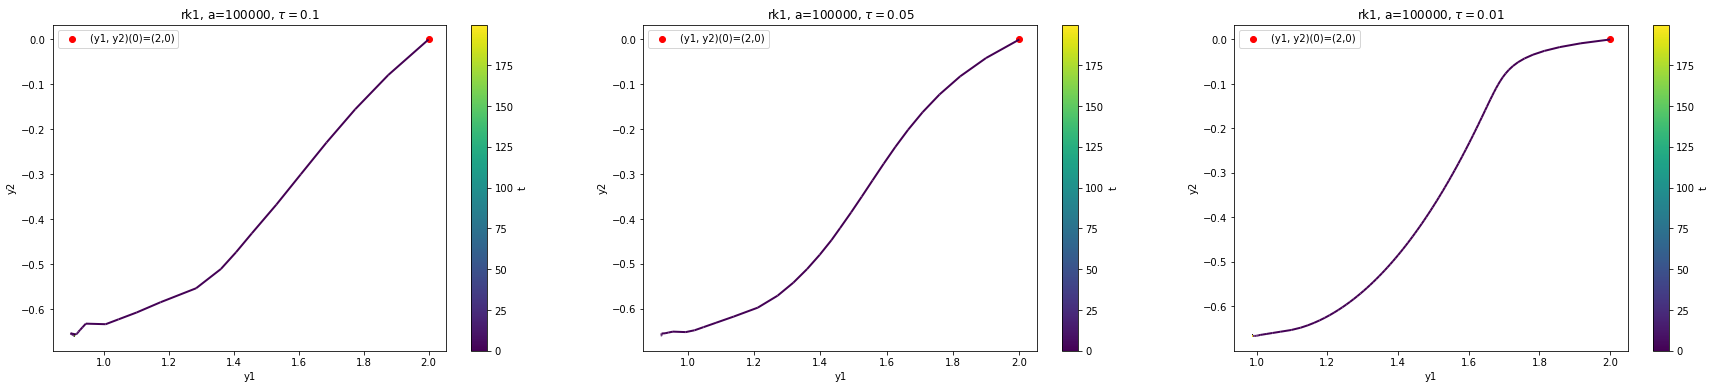

In [58]:
show_rk_results(a = 100000, tau0 = 0.1, A = A1,b = b1 )

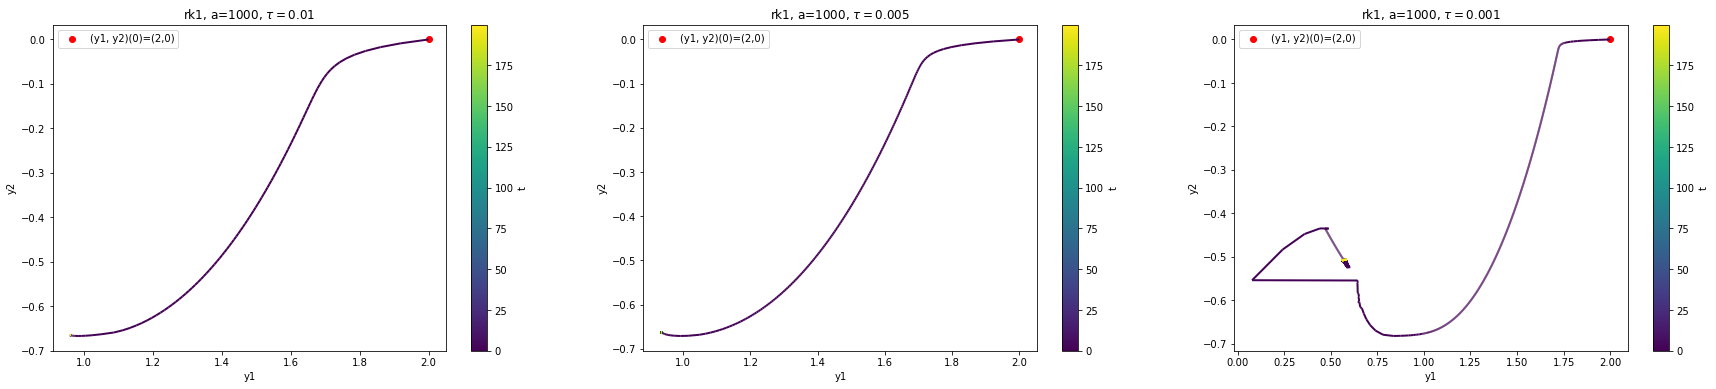

In [59]:
show_rk_results(a = 1000, tau0 = 0.01, A = A1,b = b1 )

Интересно посмотреть, что будет если параметр a сделать маленьким

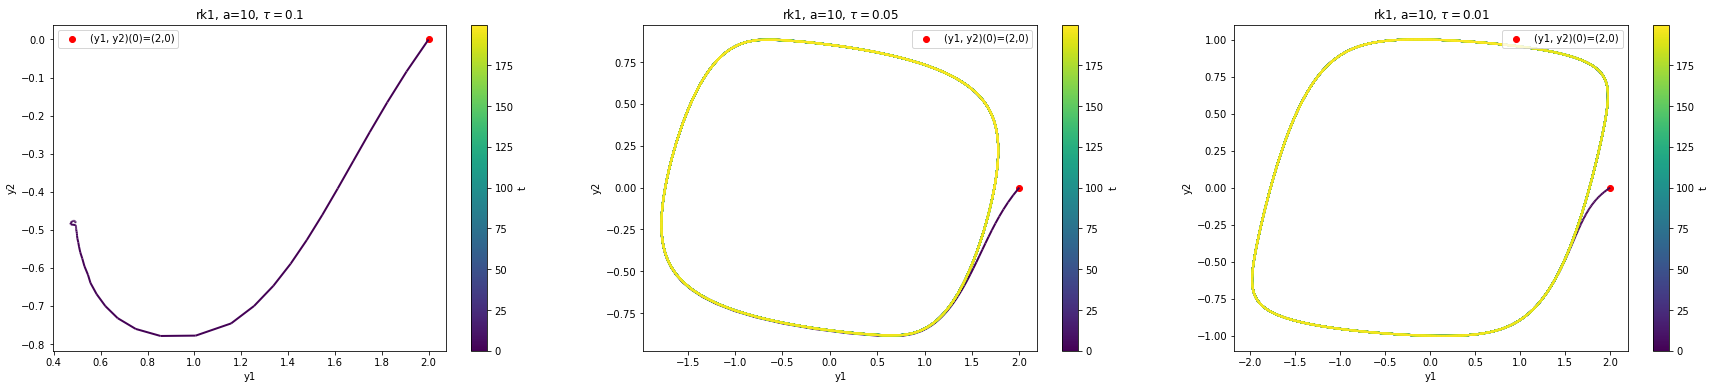

In [60]:
show_rk_results(a = 10, tau0 = 0.1, A = A1,b = b1 )

С уменьшением шага цикл начинает находиться, однако при недостаточно малом шаге "срыв" с кривой горизонтальных касательных происходит в разных местах. Данная проблема решается уменьшением шага.

При этом занимает достоточно времени, чтобы все подсчитать